In [ ]:
#loading json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"usamaarain","key":"51540ecd56f0aee4d4570d47de16024e"}'}

In [ ]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Aug  1 19:46 kaggle.json


In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Download dataset
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 98% 727M/745M [00:03<00:00, 205MB/s]
100% 745M/745M [00:03<00:00, 199MB/s]


In [ ]:
!unzip covid19-radiography-database.zip -d covid19-radiography-database

Streaming output truncated to the last 5000 lines.
  inflating: covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-

In [ ]:
!pip install wwf timm -qqq

     |████████████████████████████████| 376 kB 9.3 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 188 kB 12.7 MB/s 


In [ ]:
!pip install fastai -q --upgrade

In [ ]:
!pip install fastai2_extensions

In [ ]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from fastai.vision.widgets import *

In [ ]:
import timm

In [ ]:
from timm import *

In [ ]:
from fastai2_extensions.interpret.all import *

In [ ]:
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy

In [ ]:
data = Path('/content/covid19-radiography-database/COVID-19_Radiography_Dataset')

In [ ]:
data.ls()

(#9) [Path('/content/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia'),Path('/content/covid19-radiography-database/COVID-19_Radiography_Dataset/README.md.txt'),Path('/content/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID.metadata.xlsx'),Path('/content/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx'),Path('/content/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal.metadata.xlsx'),Path('/content/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx'),Path('/content/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID'),Path('/content/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity'),Path('/content/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal')]

In [ ]:
mask_datablock = DataBlock(
           get_items=get_image_files,
           get_y=parent_label,
           blocks=(ImageBlock, CategoryBlock), 
           item_tfms=RandomResizedCrop(256, min_scale=0.3),
           splitter=RandomSplitter(valid_pct=0.2, seed=42),
           batch_tfms=aug_transforms(mult=2))

In [ ]:
dls = mask_datablock.dataloaders(data,bs=18)

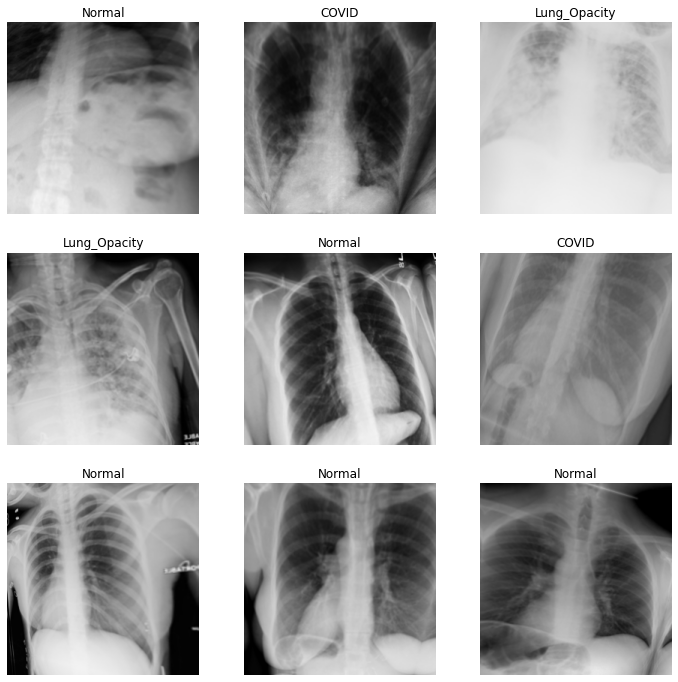

In [ ]:
dls.show_batch(max_n=9,figsize=(12,12))

In [ ]:
learn = cnn_learner(dls , models.vgg16_bn , metrics= accuracy)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


SuggestedLRs(valley=0.0012022644514217973)

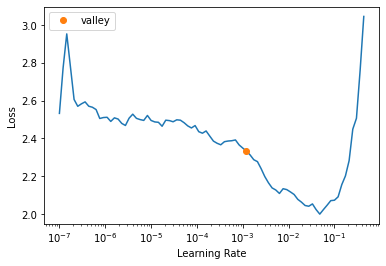

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_flat_cos(7)

epoch,train_loss,valid_loss,accuracy,time
0,0.573517,0.358205,0.869360,06:31
1,0.442976,0.284580,0.900543,06:29
2,0.414977,0.258066,0.905977,06:29
3,0.391688,0.302334,0.887786,06:29
4,0.373165,0.288386,0.896291,06:28
5,0.365562,0.249847,0.912119,06:28
6,0.313990,0.211001,0.923222,06:28


In [ ]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.354987,0.229438,0.916608,06:26
1,0.325068,0.269932,0.900780,06:29
2,0.340499,0.216863,0.924403,06:29
3,0.341234,0.228513,0.922277,06:29
4,0.309978,0.205880,0.928892,06:28
5,0.315723,0.206823,0.926530,06:29


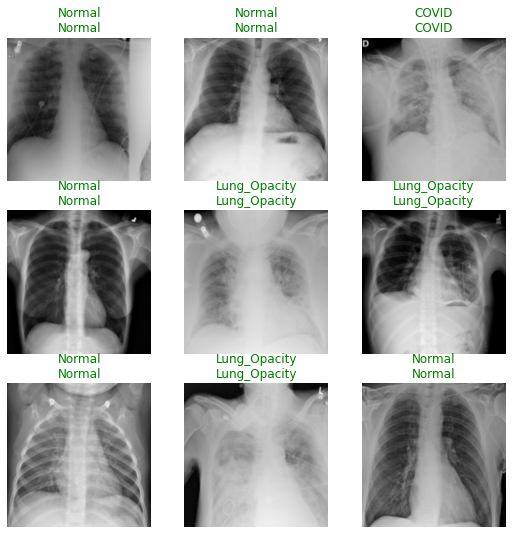

In [ ]:
learn.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
losses,idxs = interp.top_losses()

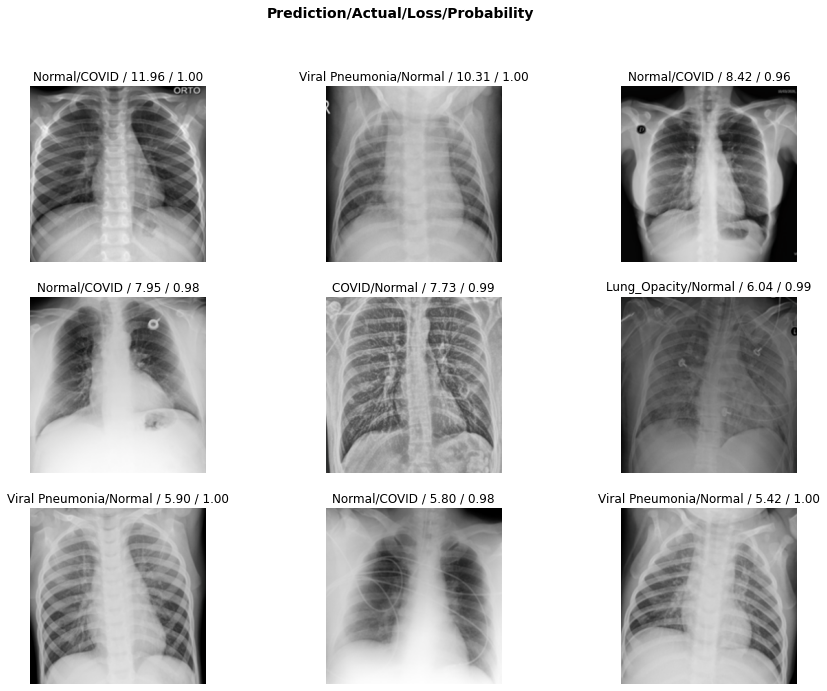

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

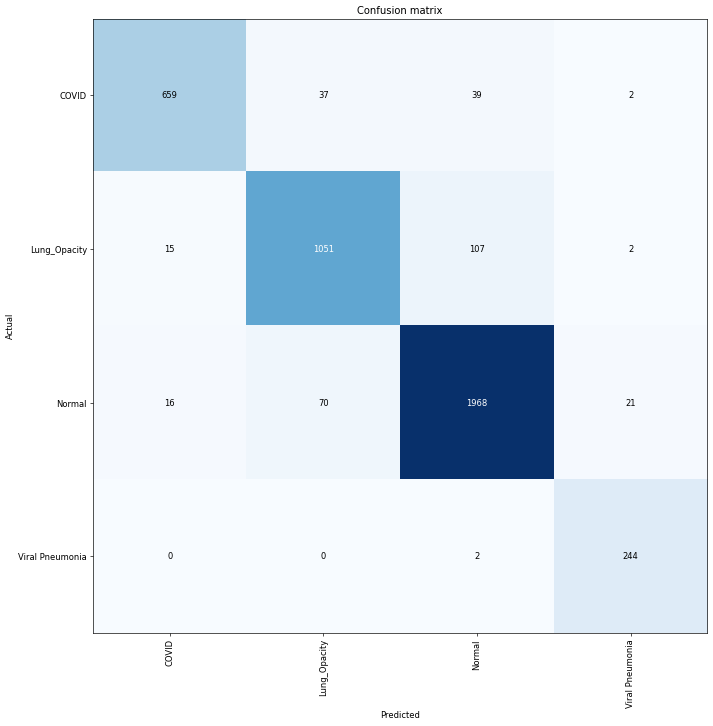

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=3)

[('Lung_Opacity', 'Normal', 107),
 ('Normal', 'Lung_Opacity', 70),
 ('COVID', 'Normal', 39),
 ('COVID', 'Lung_Opacity', 37),
 ('Normal', 'Viral Pneumonia', 21),
 ('Normal', 'COVID', 16),
 ('Lung_Opacity', 'COVID', 15)]